## ThinkStats2 Chapter 3

This notebook is a condensed view of the responses from the class to the questions in the reading notebook for Chapter 3 of ThinkStats2.

In [3]:
%matplotlib inline
import nsfg
import chap01soln
import thinkstats2

resp = chap01soln.ReadFemResp()
preg = nsfg.ReadFemPreg()

#### Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

Here is the correct solution (I didn't see any problems in the notebooks on this one).

In [6]:
pmf = thinkstats2.Pmf(resp.numkdhh)
print pmf

Pmf({0: 0.46617820227659301, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.087138558157791451, 4: 0.025644380478869556, 5: 0.010728771424833181})


#### Display the PMF.

Here is the correct solution.

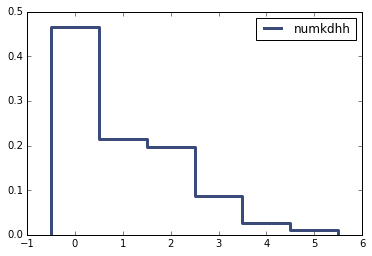

In [8]:
import thinkplot

thinkplot.Pmf(pmf, label='numkdhh')
thinkplot.Show()

The only problem I saw on this one were people accidentally setting the xlim of the plot so that it cut off some of the values.  Printing the pmf is a good sanity check to make sure you don't do this.

Define <tt>BiasPmf</tt>.

In [9]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

#### Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

Here is a correct solution.

In [11]:
biaspmf = BiasPmf(pmf)
print biaspmf

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166})


I didn't really see any problems with this one in terms of getting the right answer, but it seemed like there was some general confusion on this question.

1. When would you _want_ to bias the PMF?  It seems like having to _unbias_ your data would be more common.
2. So when is a biased pmf not preferable to a pmf? I guess I'm struggling to understand why we even study having a pmf at all.  I'd also like to talk about exactly what the biased pmf of number of children really meant. I understand the book's example with class size, but in any data set where one of the options is 0, it feels just plain inaccurate to multiply 0 by that value's probability to get a biased probability for it.
3.  The "biased" wording still seems strange to me somehow... The class size paradox in the reading made it seem as if the BiasPmf calculation was some representation for what the students are feeling versus the reality of the situation (the pmf). I'm still unclear how these multiplications mirror the perception of the students. 

#### Display the actual Pmf and the biased Pmf on the same axes.

Here is a correct solution.  As above, people didn't have any problems doing this exercise, but there was general confusion.

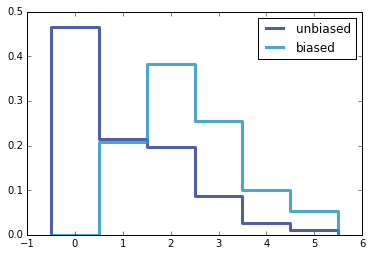

In [20]:
thinkplot.PrePlot(2)
thinkplot.Pmf(pmf, label='unbiased')
thinkplot.Pmf(biaspmf, label='biased')
thinkplot.Show()

#### Compute the means of the two Pmfs.

Correct solution:

In [23]:
print "Unbiased mean", pmf.Mean()
print "Biased mean", biaspmf.Mean()

Unbiased mean 1.02420515504
Biased mean 2.40367910066
6


The two errors I saw on this question were:
1.  Looping over the elements of the pmfs, but hardcoding the wrong total number of elements (you can use len(pmf) to get the number of elements.
2.  Misunderstanding what the question meant and averaging the mean of the biased and unbiased pmfs: `pmf.Mean() + biaspmf.Mean())/2`

### ThinkStats Chapter 3, Exercise 3

I started with the question, “Are first babies more likely to be late?” To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use nsfg.MakePregMap.

A correction solution that uses `nsfg.MakePregMap`.

Mean difference between pairs 0.0859556494192


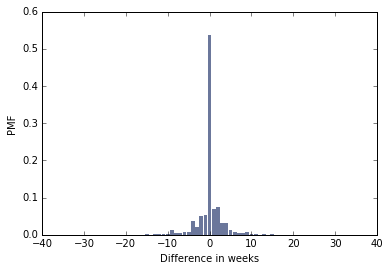

In [48]:
live = preg[preg.outcome == 1]
preg_map = nsfg.MakePregMap(live)
all_pairwise_diffs = []

for case_id, pregnancies in preg_map.items():
    pairwise_diffs = live.loc[pregnancies[0]].prglngth - live.loc[pregnancies[1:]].prglngth
    all_pairwise_diffs.extend(list(pairwise_diffs))

pairwise_pmf = thinkstats2.Pmf(all_pairwise_diffs)
print 'Mean difference between pairs', pairwise_pmf.Mean()

thinkplot.Hist(pairwise_pmf, align='center')
thinkplot.Show(xlabel='Difference in weeks', ylabel='PMF')

A correct solution that uses `groupby`.

Mean difference between pairs 0.0859556494192


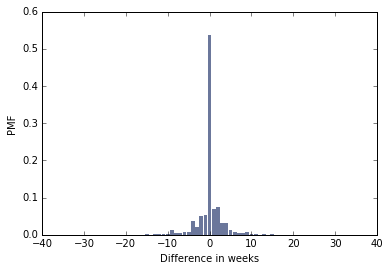

In [49]:
live = preg[preg.outcome == 1]
all_pairwise_diffs = []

for index, pregnancies in live.groupby('caseid'):
    pairwise_diffs = pregnancies.iloc[0].prglngth - pregnancies.iloc[1:].prglngth
    all_pairwise_diffs.extend(list(pairwise_diffs))

pairwise_pmf = thinkstats2.Pmf(all_pairwise_diffs)
print 'Mean difference between pairs', pairwise_pmf.Mean()

thinkplot.Hist(pairwise_pmf, align='center')
thinkplot.Show(xlabel='Difference in weeks', ylabel='PMF')

The errors that I saw for this question were mostly either not properly understanding the question (but not in a consistent way across the class) or forgetting to only consider live births (preg.outcome == 1).  There were a lot of clarifying questions asked about this question.

1. Pairwise difference wasn't covered in the book
2. I'm not sure what the last question is asking,...
3. I am so confused about the last question. 
4. Not actually sure how we're supposed to use the mapping above...
5. I'm not entirely sure what the last question is asking. The rest of it was very intuitive, but the last question reminds me of the question on 
6. I found the last question really difficult because I think it's poorly worded. Rather than being concise, as it seems that is what Allen was trying to do, I would have much preferred it to be explained in more detail. It was really frustrating trying to figure out what he meant.

### Additional Resources / Explorations


<p>
Used to figure out what pairwise difference is
http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/nonparametrics-tests/what-are-pairwise-statistics/
</p>

Just for reference, the codebook is [here](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=shortLabel&fileCode=PREG&section=&subSec=8014).